# Transmission
Generates functions to aproximate PMMA transmission and quantum efficiency curves of the panOSETI optics

Author: Nik Korzoun

In [425]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## PMMA transmission

### source (C. Joram 2009)
![Image](PMMA.png)

https://cds.cern.ch/record/1214725/files/PH-EP-Tech-Note-2009-003.pdf

Note thickness is 2 mm. The thickness of the panoSETI lens is 1.8 mm. Other plots (i.e. https://www.gsoptics.com/transmission-curves/) show there is little difference in transmission between 2 mm and 2.5 mm. This will serve as a lower limit on the transmission.

### duplication

In [426]:
# wavelengths spaced every 5nm
wavelengths = np.linspace(200, 500,61)
transmission = np.zeros(len(wavelengths))
# estimate points between 360 nm - 410 nm
transmission[wavelengths==360]= 0.
transmission[wavelengths==365]= 0.01
transmission[wavelengths==370]= 0.03
transmission[wavelengths==375]= 0.1
transmission[wavelengths==380]= 0.3
transmission[wavelengths==385]= 0.5
transmission[wavelengths==390]= 0.7
transmission[wavelengths==395]= 0.82
transmission[wavelengths==400]= 0.88
transmission[wavelengths==405]= 0.9
transmission[wavelengths==410]= 0.91
# set points > 410 nm to 92%
transmission[wavelengths>410] = 0.92

In [427]:
# fit - choose sigmoid function
def sigmoid(x,k,L,x0):
    denom = 1.+np.exp(-k*(x-x0))
    s = L/denom
    return s

params,_ = curve_fit(sigmoid,wavelengths,transmission,[0.5,1,370])

In [428]:
params

array([2.04647724e-01, 9.18909275e-01, 3.84163423e+02])

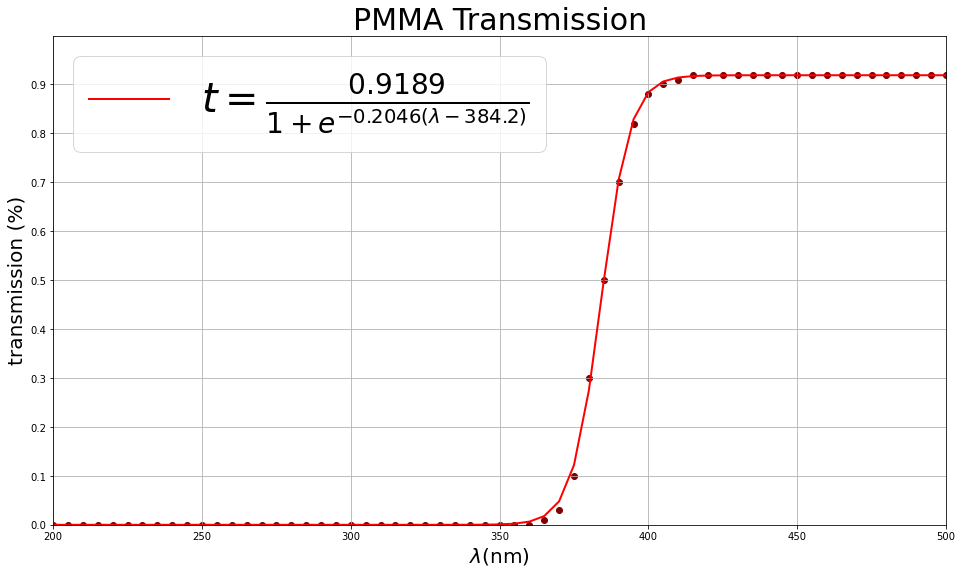

In [429]:
# plot
fig = plt.figure(figsize=(16,9))
plt.title("PMMA Transmission",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.xlim(200,500)
plt.ylabel("transmission (%)",fontsize=20)
plt.yticks(np.arange(0,1,0.1))
plt.ylim(0,1)
plt.scatter(wavelengths,transmission,c='maroon')
plt.plot(wavelengths,sigmoid(wavelengths,*params),c='red',lw=2,label=r'$t=\frac{0.9189}{1+e^{-0.2046(\lambda-384.2)}}$')
plt.grid()
plt.legend(loc='upper left',fontsize=40)
plt.show()

## Quantum Efficiency

### source (Hammamatsu)
![Image](Qeff.png)

https://www.hamamatsu.com/content/dam/hamamatsu-photonics/sites/documents/99_SALES_LIBRARY/ssd/s13361-3050_series_kapd1054e.pdf

### duplication

In [430]:
# wavelengths spaced every 20nm
wavelengths = np.linspace(300,900,31)
qeff = np.zeros(len(wavelengths))
# estimate points between 320 nm - 900 nm
qeff[wavelengths==300]= 0.00
qeff[wavelengths==320]= 0.05
qeff[wavelengths==340]= 0.13
qeff[wavelengths==360]= 0.25
qeff[wavelengths==380]= 0.32
qeff[wavelengths==400]= 0.35
qeff[wavelengths==420]= 0.38
qeff[wavelengths==440]= 0.4
qeff[wavelengths==460]= 0.4
qeff[wavelengths==480]= 0.39
qeff[wavelengths==500]= 0.38
qeff[wavelengths==520]= 0.37
qeff[wavelengths==540]= 0.35
qeff[wavelengths==560]= 0.32
qeff[wavelengths==580]= 0.28
qeff[wavelengths==600]= 0.26
qeff[wavelengths==620]= 0.24
qeff[wavelengths==640]= 0.21
qeff[wavelengths==660]= 0.19
qeff[wavelengths==680]= 0.17
qeff[wavelengths==700]= 0.15
qeff[wavelengths==720]= 0.14
qeff[wavelengths==740]= 0.12
qeff[wavelengths==760]= 0.11
qeff[wavelengths==780]= 0.09
qeff[wavelengths==800]= 0.08
qeff[wavelengths==820]= 0.07
qeff[wavelengths==840]= 0.06
qeff[wavelengths==860]= 0.05
qeff[wavelengths==880]= 0.04
qeff[wavelengths==900]= 0.04

In [431]:
# fit - choose polynomial
fit = np.polyfit(wavelengths,qeff, 4)
poly = np.poly1d(fit)

In [432]:
fit

array([-3.24385503e-11,  9.37599449e-08, -9.88002081e-05,  4.40204943e-02,
       -6.62331046e+00])

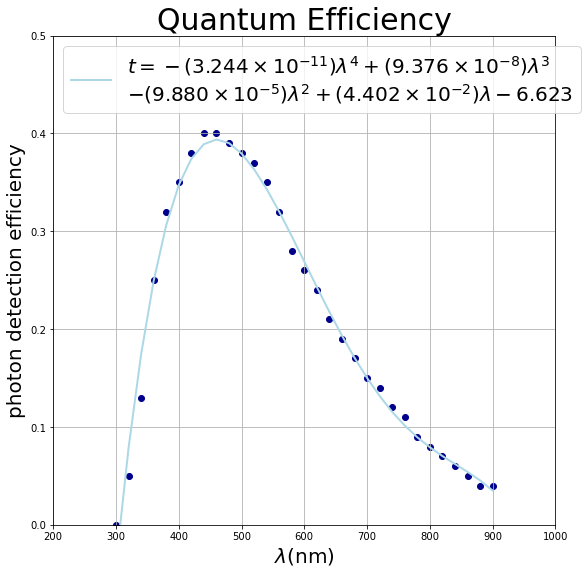

In [433]:
# plot
fig = plt.figure(figsize=(9,9))
plt.title("Quantum Efficiency",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.xlim(200,1000)
plt.ylabel("photon detection efficiency",fontsize=20)
plt.yticks(np.arange(0,0.6,0.1))
plt.ylim(0,0.5)
plt.scatter(wavelengths,qeff,c='darkblue')
plt.plot(wavelengths,poly(wavelengths),c='lightblue',lw=2,label=r'$t=-(3.244\times 10^{-11})\lambda^4+(9.376\times 10^{-8})\lambda^3$'+'\n'+r'$-(9.880\times 10^{-5})\lambda^2+(4.402\times 10^{-2})\lambda-6.623$')
plt.grid()
plt.legend(loc='upper left',fontsize=20)
plt.show()